In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import matplotlib.pyplot as plt

In [2]:
#load the data
df = pd.read_csv('/Users/sebastian/Desktop/personal_stuff/EG/taxify/robotex.csv')
df = df.set_index(['start_time'])
df.head()

,start_lat,start_lng,end_lat,end_lng,ride_value
start_time,,,,,
2022-03-01 00:00:00.133110000,59.436431,24.556602,59.438643,24.754031,2.74000
2022-03-01 00:00:01.112760000,59.402839,24.692944,59.437790,24.743403,1.19600
2022-03-01 00:00:01.780696000,59.407155,24.690181,59.523082,24.820903,3.69300
2022-03-01 00:00:01.821318000,59.405499,24.722777,59.442098,24.764780,1.17075
2022-03-01 00:00:01.881445000,59.442498,24.740105,59.451593,24.738421,0.25325


In [3]:
#split the dataframe hourwise and use time stamp as index
df_0 = df.loc['2022-03-01 00:00:00*':'2022-03-01 01:00:00*']
df_1 = df.loc['2022-03-01 01:00:00*':'2022-03-01 02:00:00*']
df_8 = df.loc['2022-03-01 08:00:00*':'2022-03-01 09:00:00*']
df_0.tail()

,start_lat,start_lng,end_lat,end_lng,ride_value
start_time,,,,,
2022-03-01 00:59:55.926753000,59.434162,24.768303,59.436680,24.751376,0.24500
2022-03-01 00:59:55.949169000,59.379558,24.539558,59.392457,24.720749,2.53925
2022-03-01 00:59:58.654974000,59.477130,24.923310,59.429408,24.714201,3.18925
2022-03-01 00:59:58.885324000,59.451005,24.852003,59.427469,24.774002,1.26400
2022-03-01 00:59:59.835685000,59.383947,24.672523,59.408012,24.723901,0.97675


In [4]:
#select start_lat and start_lng from dataframe and convert pd_dataframe to np_array
coords_0 = df_0.loc[:'start_lat',:'start_lng'].values
coords_1 = df_1.loc[:'start_lat',:'start_lng'].values
coords_8 = df_8.loc[:'start_lat',:'start_lng'].values
print(coords_0)

[[59.43643079 24.5566016 ]
 [59.40283924 24.69294409]
 [59.40715529 24.69018063]
 ...
 [59.47712965 24.92330987]
 [59.45100524 24.85200271]
 [59.38394672 24.67252298]]


In [5]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

# define epsilon as 0.4 kilometers, converted to radians for use by haversine
epsilon = .4 / kms_per_radian

In [6]:
#Density-Based Spatial Clustering of Applications with Noise for clustering the arrays
db_0 = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_0))
db_1 = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_1))
db_8 = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_8))
print(db_0)

DBSCAN(algorithm='ball_tree', eps=6.278440550890465e-05, leaf_size=30,
    metric='haversine', metric_params=None, min_samples=10, n_jobs=1,
    p=None)


In [7]:
#set cluster labels
cluster_labels_0 = db_0.labels_
cluster_labels_1 = db_1.labels_
cluster_labels_8 = db_8.labels_
print(cluster_labels_0)

[-1  0  0 ... -1  3  1]


In [8]:
#get the number of clusters
num_clusters_0 = len(set(cluster_labels_0))
num_clusters_1 = len(set(cluster_labels_1))
num_clusters_8 = len(set(cluster_labels_8))
print(num_clusters_0)

19


In [9]:
#turn the clusters in to a pandas series, where each element is a cluster of points
clusters_0 = pd.Series([coords_0[cluster_labels_0 == n] for n in range(num_clusters_0)])
clusters_1 = pd.Series([coords_1[cluster_labels_1 == n] for n in range(num_clusters_1)])
clusters_8 = pd.Series([coords_8[cluster_labels_8 == n] for n in range(num_clusters_8)])
print(clusters_0)

0     [[59.40283923972711, 24.69294409437466], [59.4...
1     [[59.38607300448272, 24.69213111088469], [59.3...
2     [[59.4418514118956, 24.87454753873742], [59.44...
3     [[59.44129408897275, 24.841235606407828], [59....
4     [[59.416679703502595, 24.79902331333763], [59....
5     [[59.400669500445424, 24.648455286420997], [59...
6     [[59.426779107190846, 24.622475130586782], [59...
7     [[59.50769680753433, 24.82983117359132], [59.5...
8     [[59.37344916346678, 24.71240901956801], [59.3...
9     [[59.41662857130694, 24.88650733117569], [59.4...
10    [[59.498390585831025, 24.828926123410948], [59...
11    [[59.45100844443674, 24.83673559871785], [59.4...
12    [[59.5074072415699, 24.85107540593912], [59.50...
13    [[59.42700853434451, 24.634547190848583], [59....
14    [[59.400247327732295, 24.71932810022236], [59....
15    [[59.38737912206393, 24.661052915476944], [59....
16    [[59.37766137846054, 24.666538318936357], [59....
17    [[59.367750945499274, 24.645455361272173],

In [10]:
#print the number of clusters
print('Number of clusters: {}'.format(num_clusters_0))
print('Number of clusters: {}'.format(num_clusters_1))
print('Number of clusters: {}'.format(num_clusters_8))

Number of clusters: 19
Number of clusters: 20
Number of clusters: 20


In [11]:
#centeroidnp + .vectorize function finds the centroid of each cluster
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [12]:
centeroidnp = np.vectorize(centeroidnp)

In [20]:
#store centroids of clusters_0 and clusters_8 in clusters_0_centr and clusters_8_centr
clusters_0_centr = centeroidnp(clusters_0)
clusters_1_centr = centeroidnp(clusters_1)
clusters_8_centr = centeroidnp(clusters_8)
print(clusters_0_centr)

(array([59.43305716, 59.3856485 , 59.44680799, 59.44119425, 59.41729355,
       59.39967398, 59.4281764 , 59.50930579, 59.37564183, 59.41669478,
       59.4962397 , 59.45136932, 59.50610652, 59.42753015, 59.39877494,
       59.38869031, 59.37683061, 59.3688034 ,         nan]), array([24.73810698, 24.67835156, 24.88034304, 24.82617576, 24.79886029,
       24.64712911, 24.6203348 , 24.83066395, 24.71406063, 24.88638675,
       24.83246091, 24.83722244, 24.8531834 , 24.63486281, 24.71710754,
       24.65497316, 24.66459168, 24.64335075,         nan]))


/Users/sebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/sebastian/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2831: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [77]:
x_0 = clusters_0_centr[0]
y_0 = clusters_0_centr[1]
x_1 = clusters_1_centr[0]
y_1 = clusters_1_centr[1]
x_8 = clusters_8_centr[0]
y_8 = clusters_8_centr[1]

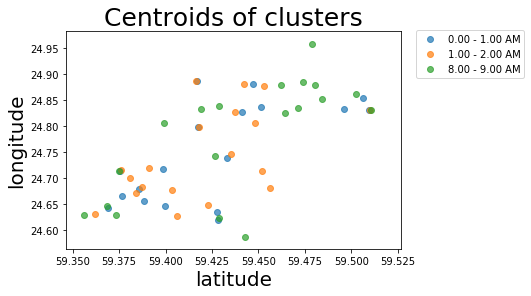

In [138]:
times = ['0.00 - 1.00 AM','1.00 - 2.00 AM','8.00 - 9.00 AM']
plt.scatter(x_0,y_0, alpha = 0.7, label="test1")
plt.scatter(x_1,y_1, alpha = 0.7)
plt.scatter(x_8,y_8, alpha = 0.7)
plt.xlabel('latitude', size = 20)
plt.ylabel('longitude', size = 20)
plt.title('Centroids of clusters', size = 25)
plt.legend(times, loc = 'upper left', bbox_to_anchor=(1.03, 1.03))
plt.show()

NameError: name 'rand' is not defined

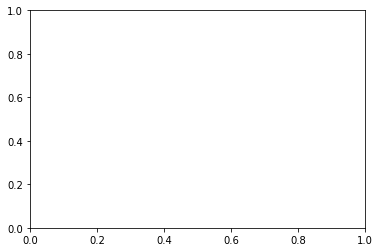